# AULA 3 DEMONSTRAÇÃO 1- Introdução à Otimização para Redes Neurais

Aula 2- Aula Assíncrona
https://www.youtube.com/watch?time_continue=9&v=xkO_72hW7WY&ab_channel=MoacirAntonelliPonti

---

## Otimização para Redes Neurais

- Implementando um modelo de perceptron com Pytorch para regressão

---

In [879]:
import torch
import numpy as np
import matplotlib.pyplot as plt

- modelo da aula anterior -> completar com o que faltava para um Perceptron
    - treianmento do perceptron basicamente

* utilizamos o gradient descent normal primeiramente, sem aproveitar todo o batch ou parte dele

In [880]:
class Perceptron():

    def __init__(self, num_inputs, learning_rate = 0.01):
        self.w = torch.normal(0, 1, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)
        self.num_inputs = num_inputs
        self.lr = learning_rate

    def act_relu(self, x):
        a = torch.zeros_like(x)
        return torch.max(x, a)
    
    def forward(self, X):
        # X w + b
        linear = X @ self.w + self.b # multipliação e soma matricial
        return self.act_relu(linear)

    def squared_loss(self, y, y_hat):
        yr = y.reshape(y_hat.shape)
        l = (y_hat - yr)**2/2
        return l.mean()

    def backward(self, X, y):
        y_hat = self.forward(X)
        errors = (y.reshape(y_hat.shape) - y_hat) # diferenciação
        return errors

    def train_step(self, X, y):
        for i in range(y.shape[0]): # roda o dataset
            error = self.backward(x[i].reshape(1, self.num_inputs), y[i].reshape(-1))
            # gradient descent
            self.w = self.w + self.lr*(error * X[i]).reshape(self.num_inputs, 1)
            self.b = self.b + self.lr*error

In [881]:
model = Perceptron(3, learning_rate=0.0005)
model.w, model.b, model.lr

(tensor([[ 0.5929],
         [-0.2211],
         [ 0.4114]], requires_grad=True),
 tensor([0.], requires_grad=True),
 0.0005)

- a ideia é: sabemos o y de "gabarito" e queremos que a partir de x e do erro, o perceptron ajustes o peso e bias para chegar na saída desejada
    - x é uma matriz 10x3 enquanto y é 1x10, ou seja, é como se cada linha de x representasse uma posição de y através de alguma aritmética que a rede vai encontrar

In [882]:
# X: 3 dimensões por instancia
X = torch.arange(30,  dtype = torch.float32).reshape((10,3)) + torch.normal(0, 2, (10,3)) 
y =  torch.arange(10,  dtype = torch.float32)
#* x: Entrada da rede, y: saída correta
X, y

(tensor([[ 0.3315, -1.2593, -0.1489],
         [ 0.9981,  6.4734,  4.2983],
         [ 6.0768,  4.3787,  6.2690],
         [ 6.6440, 11.4289, 11.7237],
         [11.8838, 12.0881, 13.1118],
         [13.5354, 17.4647, 19.2392],
         [17.7318, 16.6775, 16.6952],
         [20.5453, 21.9506, 24.6829],
         [24.8127, 23.8495, 28.0141],
         [26.4811, 27.5561, 27.0526]]),
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

* abaixo, nós usamos o passo pra frente pra a partir dos valores de inicialização, tentar chegar em y
    * como dá pra ver, o erro foi grande, o que já era esperado para o primeiro passo pra frente
    * o erro quadrático já sinaliza isso com valores muito maiores que 0

In [883]:
try1 = model.forward(X)
try1, y, model.squared_loss(y, try1) 

(tensor([[ 0.4137],
         [ 0.9289],
         [ 5.2138],
         [ 6.2354],
         [ 9.7674],
         [12.0787],
         [13.6941],
         [17.4825],
         [20.9632],
         [20.7373]], grad_fn=<MaximumBackward0>),
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor(28.9617, grad_fn=<MeanBackward0>))

* "épocas são o números de vezes que o algoritmo vai ver o conjunto de treinamento completo"

In [884]:
epochs = 100
loss_plot = list()
for e in range(epochs):
    model.train_step(X,y)
    loss = model.squared_loss(y, model.forward(X)).item()
    loss_plot.append(loss)
    if e % 20 == 0:
        print('Parameters: ', model.w.detach().numpy(), model.b.item())
        print(f'Squared Loss: {loss:.6f}')
        

Parameters:  [[ 0.44854006]
 [-0.37810647]
 [ 0.23537663]] -0.012424328364431858
Squared Loss: 0.368964
Parameters:  [[ 0.39392006]
 [-0.2933501 ]
 [ 0.20789683]] -0.01026324275881052
Squared Loss: 0.271401
Parameters:  [[ 0.34848857]
 [-0.21892488]
 [ 0.18162803]] -0.009464768692851067
Squared Loss: 0.202366
Parameters:  [[ 0.31057188]
 [-0.15346335]
 [ 0.15664603]] -0.009739168919622898
Squared Loss: 0.154429
Parameters:  [[ 0.2788539 ]
 [-0.09574409]
 [ 0.13304539]] -0.010848434641957283
Squared Loss: 0.101880


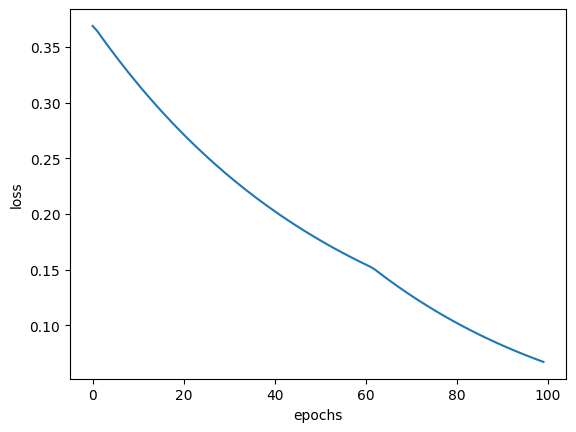

(tensor([[0.1142],
         [0.4165],
         [2.0232],
         [2.4453],
         [3.8978],
         [4.7490],
         [5.5650],
         [6.9238],
         [8.2889],
         [8.4294]], grad_fn=<MaximumBackward0>),
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [885]:
plt.plot(range(epochs), loss_plot)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

model.forward(X), y

### Teste (pós treinamento)

In [886]:
X_t = torch.arange(15, dtype=torch.float32).reshape((5,3)) + torch.normal(0, 3, (5,3))
print(X_t)
y_t = torch.arange(5, dtype=torch.float32)
print(y_t)

tensor([[-1.9495,  0.3427,  0.9731],
        [ 2.3190,  2.9511,  2.9079],
        [ 5.9568,  8.3690,  3.5774],
        [ 9.4840,  7.6404, 13.2914],
        [11.5354,  9.3387, 11.9393]])
tensor([0., 1., 2., 3., 4.])


In [887]:
model.forward(X_t),  y_t, model.squared_loss(y_t, model.forward(X_t))

(tensor([[0.0000],
         [0.7617],
         [1.5034],
         [3.5193],
         [3.8078]], grad_fn=<MaximumBackward0>),
 tensor([0., 1., 2., 3., 4.]),
 tensor(0.0610, grad_fn=<MeanBackward0>))